In [1]:
import os
import pandas as pd
import numpy as np
import pylab as pl
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
import matplotlib.pyplot as pl
import seaborn as sns
A=pd.read_csv("Desktop\A1.csv")
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
A.head(5)


,Sl,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
A.isnull().sum()

Sl              0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

C:\Users\soora\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


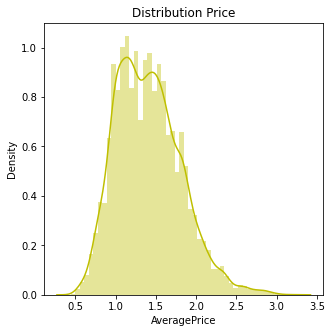

In [4]:
pl.figure(figsize=(5,5))
pl.title("Distribution Price")
ax = sns.distplot(A["AveragePrice"], color = 'y')

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

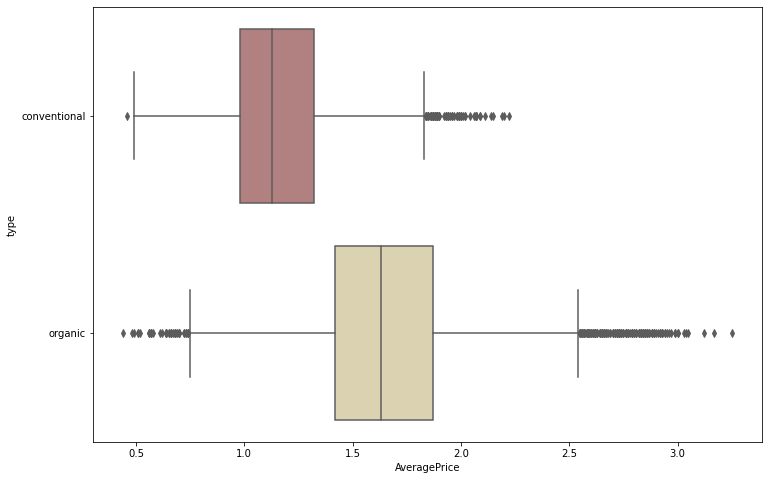

In [6]:
sns.boxplot(y="type", x="AveragePrice", data=A, palette = 'pink')

C:\Users\soora\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\soora\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\soora\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


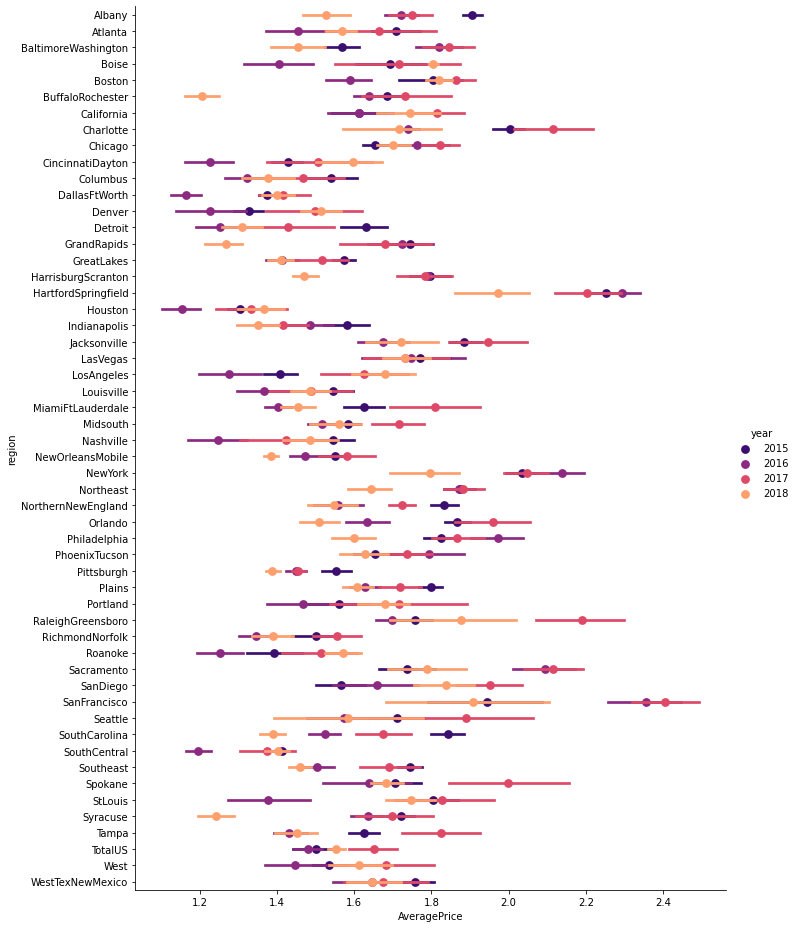

In [7]:
mask = A['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=A[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

C:\Users\soora\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\soora\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\soora\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


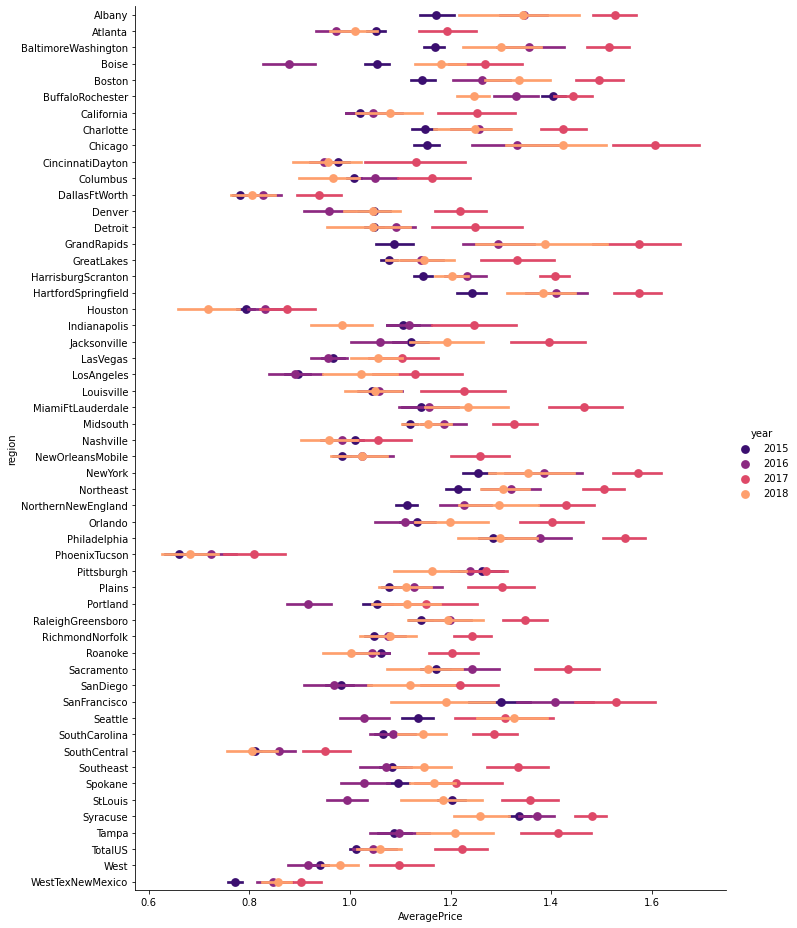

In [8]:
mask = A['type']=='conventional'
g = sns.factorplot('AveragePrice','region',data=A[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

In [9]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(A.type.drop_duplicates()) 
dicts['type'] = list(label.classes_)
A.type = label.transform(A.type) 

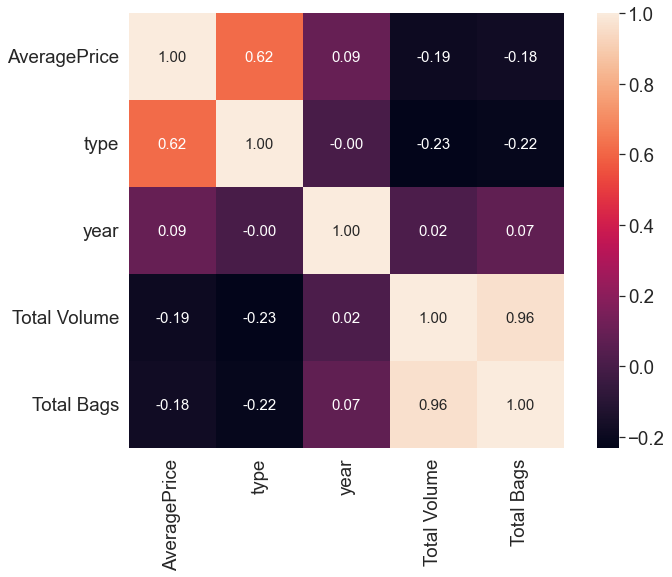

In [10]:
cols = ['AveragePrice','type','year','Total Volume','Total Bags']
cm = np.corrcoef(A[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

x = A.drop(['type','region','Date'], axis = 1)
y = A.type

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [12]:
logreg =  LogisticRegression(penalty='l2', tol=0.0001).fit(x_train,y_train)
print("LogisticRegression train data score:{:.3f}".
     format(logreg.score(x_train,y_train)))
print("LogisticRegression test data score:{:.3f}".
     format(logreg.score(x_test,y_test)))

LogisticRegression train data score:0.934
LogisticRegression test data score:0.934


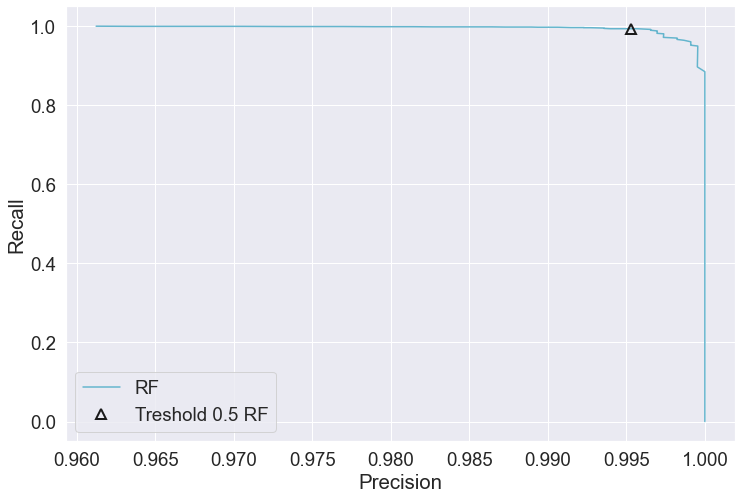

In [13]:
rf =  RandomForestClassifier(n_estimators = 100, random_state = 0, max_features = 2)
rf.fit(x_train,y_train)
precision_rf,recall_rf,thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(x_test)[:,1])

pl.plot(precision_rf,recall_rf,label = 'RF', color = 'c')
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
pl.plot(precision_rf[close_default_rf],
        recall_rf[close_default_rf],'^',c = 'k', markersize = 10,
        label = "Treshold 0.5 RF", fillstyle = "none", mew = 2)
pl.xlabel("Precision")
pl.ylabel("Recall")
pl.legend(loc = "best")

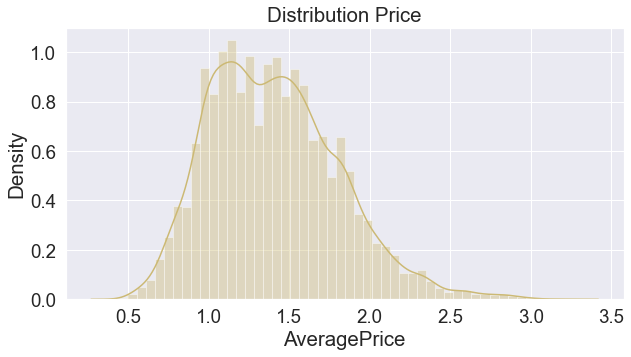

In [14]:
pl.figure(figsize=(10,5))
pl.title("Distribution Price")
ax = sns.distplot(A["AveragePrice"], color = 'y')